In [2]:
import pvlib

In [3]:
pip install NREL-PySAM==4.0.0

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///opt/conda/conda-bld/anaconda-project_1660339890420/work
anyio @ file:///tmp/build/80754af9/anyio_1644463572971/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///tmp/build/80754af9/argon2-cffi-bindings_1644569679365/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///tmp/abs_e5wkt48jiz/croots/recipe/astroid_1659023120113/work
astropy @ file:///opt/conda/conda-bld/astropy_1657786094003/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.func

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#Технические параметры СМ
данные_СМ = {  'celltype': 'multiSi', #технология СМ
               'STC': 224.99, # STC power
               'PTC': 203.3, # PTC power 
               'v_mp': 29.8, #напряжение в MP
               'i_mp': 7.55, #ток в MP
               'v_oc': 36.9, #напряжение хх
               'i_sc': 8.18, #ток кз
               'alpha_sc': 0.001636, #температурный коэффициент ток кз
               'beta_voc': -0.12177, #температурный коэфициент напряжение хх
               'gamma_pmp': -0.43, #температурный коэффициент в точке MPPT
               'cells_in_series': 60, # количество последовательно соединенных ячеек
               'temp_ref': 25} #стадартная температура

In [36]:
#Оценка параметров для модели одиночного диода Калифорнийской Энергетической Комиссии
cec_fit_params = pvlib.ivtools.sdm.fit_cec_sam(данные_СМ['celltype'], 
                                               данные_СМ['v_mp'], данные_СМ['i_mp'], 
                                               данные_СМ['v_oc'], данные_СМ['i_sc'], 
                                               данные_СМ['alpha_sc'], 
                                               данные_СМ['beta_voc'], 
                                               данные_СМ['gamma_pmp'], 
                                               данные_СМ['cells_in_series'], 
                                               данные_СМ['temp_ref'])

print(cec_fit_params)

(8.202934969951475, 1.0116474863781549e-10, 0.357990198237105, 127.6810002117698, 1.4711220130107323, 1.0522776754347636)


In [37]:
# Значения СИ (Вт/м2)
СИ = np.array([1000])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([80])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])
print('Количество возвращаемых элементов: ', len(параметры))
print(параметры)

Количество возвращаемых элементов:  5
(array([8.29196813]), array([2.58378718e-07]), 0.357990198237105, array([127.68100021]), array([1.74250122]))


In [38]:
ВАХ = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 
print(ВАХ)

OrderedDict([('i_sc', array([8.26878308])), ('v_oc', array([30.06740945])), ('i_mp', array([7.46356382])), ('v_mp', array([22.94849377])), ('p_mp', array([171.2775478])), ('i_x', array([8.14370289])), ('i_xx', array([5.09458053])), ('v', array([[ 0.        ,  0.30371121,  0.60742241,  0.91113362,  1.21484483,
         1.51855603,  1.82226724,  2.12597845,  2.42968965,  2.73340086,
         3.03711207,  3.34082327,  3.64453448,  3.94824569,  4.25195689,
         4.5556681 ,  4.85937931,  5.16309051,  5.46680172,  5.77051293,
         6.07422413,  6.37793534,  6.68164655,  6.98535775,  7.28906896,
         7.59278017,  7.89649137,  8.20020258,  8.50391379,  8.80762499,
         9.1113362 ,  9.4150474 ,  9.71875861, 10.02246982, 10.32618102,
        10.62989223, 10.93360344, 11.23731464, 11.54102585, 11.84473706,
        12.14844826, 12.45215947, 12.75587068, 13.05958188, 13.36329309,
        13.6670043 , 13.9707155 , 14.27442671, 14.57813792, 14.88184912,
        15.18556033, 15.48927154

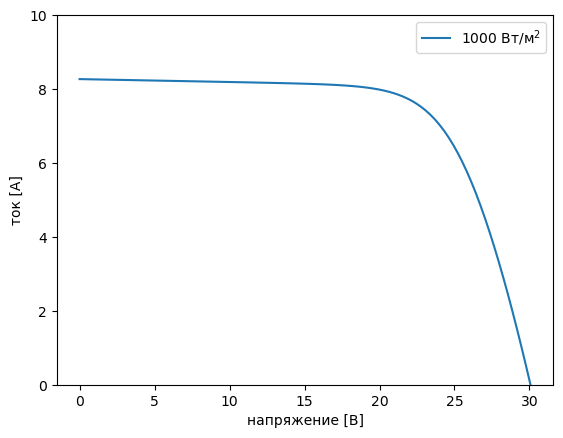

In [39]:
#Построим график
for i in range(len(СИ)):
    plt.plot(ВАХ['v'][i], ВАХ['i'][i], label=str(СИ[i])+' Вт/м$^2$')
    #plt.scatter(ВАХ['v_mp'][i], ВАХ['i_mp'][i], ВАХ['p_mp'][i])
#Добавим заголовок, метки осей и легенду:  
#plt.title('ВАХ при 40$^\circ$C')
plt.xlabel('напряжение [В]')
plt.ylabel('ток [A]')
plt.ylim(0, 10)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)

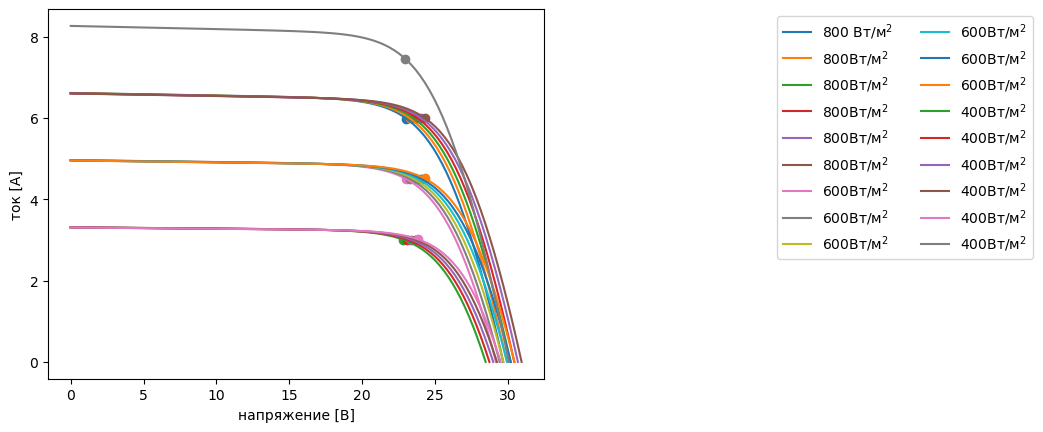

In [40]:
##### Значения СИ (Вт/м2)
СИ = np.array([800])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([80])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ1 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ1['v'][i], ВАХ1['i'][i], label=str(СИ[i])+' Вт/м$^2$')
    plt.scatter(ВАХ1['v_mp'][i], ВАХ1['i_mp'][i])


###### Значения СИ (Вт/м2)
СИ = np.array([800])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([78])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ2 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ2['v'][i], ВАХ2['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ2['v_mp'][i], ВАХ2['i_mp'][i])
    
###### Значения СИ (Вт/м2)
СИ = np.array([800])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([76])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ3 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ3['v'][i], ВАХ3['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ3['v_mp'][i], ВАХ3['i_mp'][i])
    #plt.scatter(ВАХ['v_mp'][i], ВАХ['i_mp'][i], ВАХ['p_mp'][i])
    
    
######Значения СИ (Вт/м2)
СИ = np.array([800])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([74])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ4 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ4['v'][i], ВАХ4['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ4['v_mp'][i], ВАХ4['i_mp'][i])
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([800])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([72])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ5 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ5['v'][i], ВАХ5['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ5['v_mp'][i], ВАХ5['i_mp'][i])
    
    ######Значения СИ (Вт/м2)
СИ = np.array([800])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([70])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ6 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ6['v'][i], ВАХ6['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ6['v_mp'][i], ВАХ6['i_mp'][i])
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([600])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([80])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ7 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ7['v'][i], ВАХ7['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ7['v_mp'][i], ВАХ7['i_mp'][i])
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([600])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([78])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ8 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ8['v'][i], ВАХ8['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ8['v_mp'][i], ВАХ8['i_mp'][i])
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([600])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([76])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ9 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ9['v'][i], ВАХ9['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ9['v_mp'][i], ВАХ9['i_mp'][i])
    
    ######Значения СИ (Вт/м2)
СИ = np.array([600])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([74])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ10 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ10['v'][i], ВАХ10['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ10['v_mp'][i], ВАХ10['i_mp'][i])
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([600])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([72])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ11 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ11['v'][i], ВАХ11['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ11['v_mp'][i], ВАХ11['i_mp'][i])

    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([600])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([70])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ12 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ12['v'][i], ВАХ12['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ12['v_mp'][i], ВАХ12['i_mp'][i])
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([400])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([80])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ13 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ13['v'][i], ВАХ13['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ13['v_mp'][i], ВАХ13['i_mp'][i])
    
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([400])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([78])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ14 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ14['v'][i], ВАХ14['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ14['v_mp'][i], ВАХ14['i_mp'][i])
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([400])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([76])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ15 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ15['v'][i], ВАХ15['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ15['v_mp'][i], ВАХ15['i_mp'][i])
    
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([400])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([74])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ16 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ16['v'][i], ВАХ16['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ16['v_mp'][i], ВАХ16['i_mp'][i])
    
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([400])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([72])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ17 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ17['v'][i], ВАХ17['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ17['v_mp'][i], ВАХ17['i_mp'][i])
    
    
    
    ######Значения СИ (Вт/м2)
СИ = np.array([400])
# Средняя температура ячейки (градус Цельсия)
Температура = np.array([70])

параметры = pvlib.pvsystem.calcparams_cec(СИ, Температура, данные_СМ['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

ВАХ18 = pvlib.pvsystem.singlediode(параметры[0], параметры[1], параметры[2], 
                                 параметры[3], параметры[4], 
                                 ivcurve_pnts=100, method='lambertw') 

for i in range(len(СИ)):
    plt.plot(ВАХ['v'][i], ВАХ['i'][i], label=str(СИ[i])+'Вт/м$^2$ ')
    plt.scatter(ВАХ['v_mp'][i], ВАХ['i_mp'][i])
#plt.title('ВАХ при 800 Вт/м$^2$')
plt.xlabel('напряжение [В]')
plt.ylabel('ток [A]')
plt.legend(bbox_to_anchor=(2, 1), ncol=2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


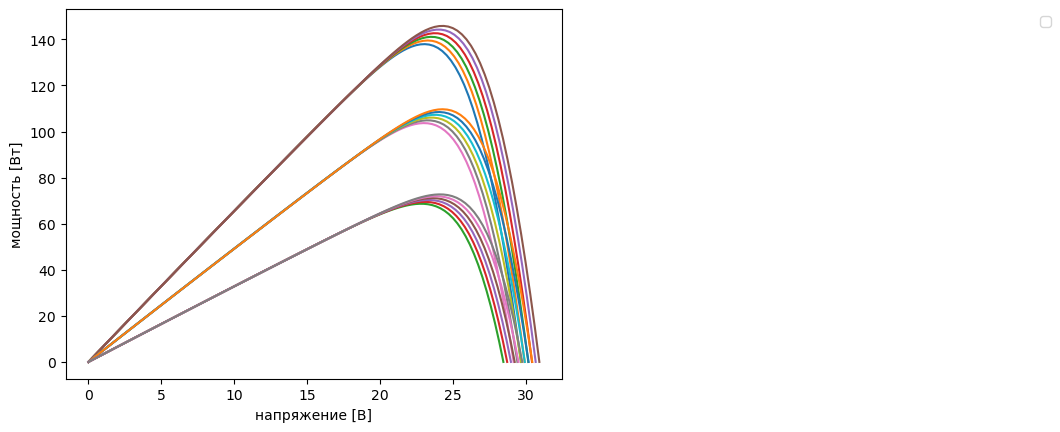

In [67]:
list_ВАХ = [ВАХ1, ВАХ2, ВАХ3, ВАХ4, ВАХ5, ВАХ6, ВАХ7, ВАХ8, ВАХ9, ВАХ10, ВАХ11, ВАХ12, ВАХ13, ВАХ14, ВАХ15, ВАХ16,
            ВАХ17, ВАХ18]

def PV(list_ВАХ):
    for ВАХ in list_ВАХ:
        list_i = []
        for x in ВАХ["i"]:
            for y in x:
                list_i.append(y)
        list_v = []
        for x in ВАХ["v"]:
            for y in x:
                list_v.append(y)
        list_p = []
        #print(list_i)
        #print(list_v)
        for i in range (len(list_i)):
            list_p.append(list_i[i] * list_v[i])
        plt.plot(list_v, list_p)
    
PV(list_ВАХ)
plt.xlabel('напряжение [В]')
plt.ylabel('мощность [Вт]')
plt.legend(bbox_to_anchor=(2, 1), ncol=2)

In [68]:
data = [
    ["СИ/Т", "80", "78", "76", "74", "72", "70"],
    ["800", ВАХ1['p_mp'],ВАХ2['p_mp'],ВАХ3['p_mp'],ВАХ4['p_mp'],ВАХ5['p_mp'],ВАХ6['p_mp']],
    ["600", ВАХ7['p_mp'],ВАХ8['p_mp'],ВАХ9['p_mp'],ВАХ10['p_mp'],ВАХ11['p_mp'],ВАХ12['p_mp']],
    ["400", ВАХ13['p_mp'],ВАХ14['p_mp'],ВАХ15['p_mp'],ВАХ16['p_mp'],ВАХ17['p_mp'],ВАХ18['p_mp']]
]

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,СИ/Т,80,78,76,74,72,70
1,800,[137.94691605757856],[139.52978299068317],[141.11268608294336],[142.69556858765145],[144.27837506385913],[145.86105133265434]
2,600,[103.6683798505514],[104.87030228956021],[106.07219340433618],[107.2740112307281],[108.475714778564],[109.67726399818893]
3,400,[68.65280126447038],[69.46709550083521],[70.28134898864208],[71.09553342279054],[71.90962116951955],[72.7235852424667]


In [70]:
from pvlib.temperature import sapm_cell, TEMPERATURE_MODEL_PARAMETERS

In [79]:
params = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

temp_cell_1000_1 = pvlib.temperature.sapm_cell(1000, -25, 0, **params)
temp_cell_1000_2 = pvlib.temperature.sapm_cell(1000, -12.5, 0, **params)
temp_cell_1000_3 = pvlib.temperature.sapm_cell(1000, 0, 0, **params)
temp_cell_1000_4 = pvlib.temperature.sapm_cell(1000, 12.5, 0, **params)
temp_cell_1000_5 = pvlib.temperature.sapm_cell(1000, 25, 0, **params)

temp_cell_800_6 = pvlib.temperature.sapm_cell(800, 25, 0, **params)
temp_cell_800_7 = pvlib.temperature.sapm_cell(800, 12.5, 0, **params)
temp_cell_800_8 = pvlib.temperature.sapm_cell(800, 0, 0, **params)
temp_cell_800_9 = pvlib.temperature.sapm_cell(800, -12.5, 0, **params)
temp_cell_800_10 = pvlib.temperature.sapm_cell(800, -25, 0, **params)

temp_cell_600_11 = pvlib.temperature.sapm_cell(600, -25, 0, **params)
temp_cell_600_12 = pvlib.temperature.sapm_cell(600, -12.5, 0, **params)
temp_cell_600_13 = pvlib.temperature.sapm_cell(600, 0, 0, **params)
temp_cell_600_14 = pvlib.temperature.sapm_cell(600, 12.5, 0, **params)
temp_cell_600_15 = pvlib.temperature.sapm_cell(600, 12.5, 0, **params)

temp_cell_400_16 = pvlib.temperature.sapm_cell(400, -25, 0, **params)
temp_cell_400_17 = pvlib.temperature.sapm_cell(400, -12.5, 0, **params)
temp_cell_400_18 = pvlib.temperature.sapm_cell(400, 0, 0, **params)
temp_cell_400_19 = pvlib.temperature.sapm_cell(400, 12.5, 0, **params)
temp_cell_400_20 = pvlib.temperature.sapm_cell(400, 25, 0, **params)

temp_cell_200_21 = pvlib.temperature.sapm_cell(200, -25, 0, **params)
temp_cell_200_22 = pvlib.temperature.sapm_cell(200, -12.5, 0, **params)
temp_cell_200_23 = pvlib.temperature.sapm_cell(200, 0, 0, **params)
temp_cell_200_24 = pvlib.temperature.sapm_cell(200, 12.5, 0, **params)
temp_cell_200_25 = pvlib.temperature.sapm_cell(200, 25, 0, **params)


data = [
    ["СИ/Т", "-25", "-12.5", "0", "12.5", "25"],
    ["1000", temp_cell_1000_1, temp_cell_1000_2, temp_cell_1000_3, temp_cell_1000_4, temp_cell_1000_5],
    ["800", temp_cell_800_6, temp_cell_800_7, temp_cell_800_8, temp_cell_800_9, temp_cell_800_10],
    ["600", temp_cell_600_11, temp_cell_600_12, temp_cell_600_13, temp_cell_600_14, temp_cell_600_15],
    ["400", temp_cell_400_16, temp_cell_400_17, temp_cell_400_18, temp_cell_400_19, temp_cell_400_20],
    ["200", temp_cell_200_21, temp_cell_200_22, temp_cell_200_23, temp_cell_200_24, temp_cell_200_25],
]

pd.DataFrame(data)

,0,1,2,3,4,5
0,СИ/Т,-25,-12.5,0,12.5,25
1,1000,9.117031,21.617031,34.117031,46.617031,59.117031
2,800,52.293625,39.793625,27.293625,14.793625,2.293625
3,600,-4.529782,7.970218,20.470218,32.970218,32.970218
4,400,-11.353188,1.146812,13.646812,26.146812,38.646812
5,200,-18.176594,-5.676594,6.823406,19.323406,31.823406
